In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import Series,DataFrame
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf


In [2]:
df=pd.read_csv('C:/Users/vedan/OneDrive/Desktop/hotel_bookings.csv')

In [3]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.rename(columns={'is_canceled':'canceled','lead_time':'time gap','stays_in_weekend_nights':'weekend nights spent','stays_in_week_nights':'weekday nights spent','meal':'meal type','is_repeated_guest':'repeated guest'},inplace=True)

In [6]:
df.head()

,hotel,canceled,time gap,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend nights spent,weekday nights spent,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.count()

hotel                             119390
canceled                          119390
time gap                          119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
weekend nights spent              119390
weekday nights spent              119390
adults                            119390
children                          119386
babies                            119390
meal type                         119390
country                           118902
market_segment                    119390
distribution_channel              119390
repeated guest                    119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [8]:
df.isnull().sum()

hotel                                  0
canceled                               0
time gap                               0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
weekend nights spent                   0
weekday nights spent                   0
adults                                 0
children                               4
babies                                 0
meal type                              0
country                              488
market_segment                         0
distribution_channel                   0
repeated guest                         0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.drop(columns=['company','agent'],axis=1,inplace=True)

In [10]:
df['children'].fillna(df['children'].mean(),inplace=True)

In [11]:
df.head()

,hotel,canceled,time gap,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend nights spent,weekday nights spent,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
which_hotel=df['hotel'].value_counts()

<BarContainer object of 2 artists>

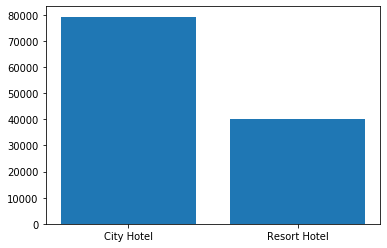

In [13]:
plt.bar(which_hotel.index,which_hotel.values)

# clearly no of bookings of city hotel are more which means people prefer to stay in city hotels .Lets see why 

In [14]:
total_resort=df['hotel'].value_counts()['Resort Hotel']
total_city=df['hotel'].value_counts()['City Hotel']
resort_cancel=df.groupby('hotel')['canceled'].sum()['Resort Hotel']
city_cancel=df.groupby('hotel')['canceled'].sum()['City Hotel']
df.groupby('hotel')['canceled'].sum()

hotel
City Hotel      33102
Resort Hotel    11122
Name: canceled, dtype: int64

In [15]:
resort_cancel_efficiency=(resort_cancel/total_resort)*100
city_cancel_efficiency=(city_cancel/total_city)*100
print('the effiency of cancellation of a resort hotel is:',resort_cancel_efficiency)
print('the effiency of cancellation of a city hotel is:',city_cancel_efficiency)


the effiency of cancellation of a resort hotel is: 27.763354967548675
the effiency of cancellation of a city hotel is: 41.72696331778646


# Here we see is the percentge of people cancelling a hotel after booking a city hotel  is higher than people cancelling a resort hotel

# Now we have to look at why city hotels are better and why they are being revoked so efficiently

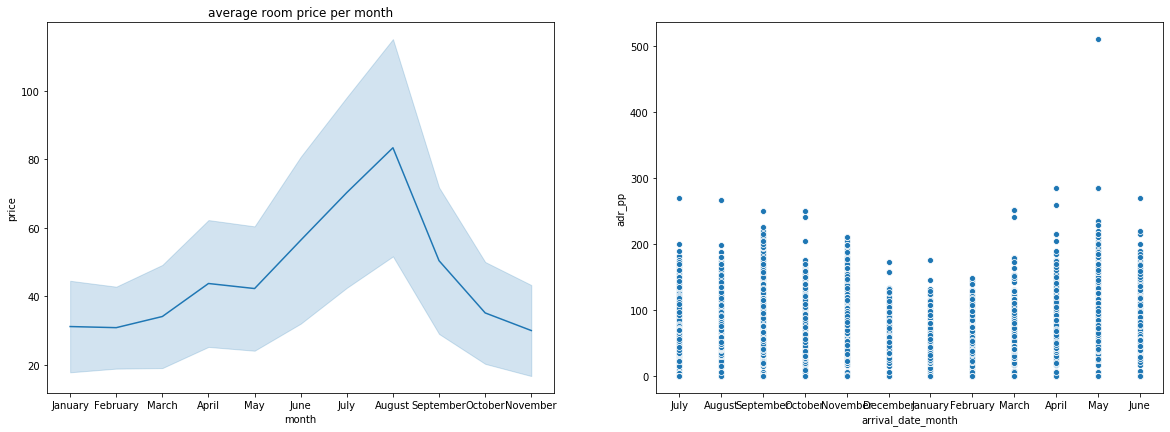

In [16]:
rh=df.loc[(df['canceled']==0) & (df['hotel']=='Resort Hotel')]
rh['total_guests']=rh['adults']+rh['children']
rh['adr_pp']=rh['adr']/rh['total_guests']
ordered=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
rh['arrival_date_month']=pd.Categorical(rh['arrival_date_month'],categories=ordered,ordered=True)
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.lineplot(x='arrival_date_month',y='adr_pp',data=rh,ci='sd')
plt.title('average room price per month')
plt.xlabel('month')
plt.ylabel('price')
ch=df.loc[(df['canceled']==0) & (df['hotel']=='City Hotel')]
ch['total_guests']=ch['adults']+ch['children']
ch['adr_pp']=ch['adr']/ch['total_guests']
ordered=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ch['arrival_date_month']=pd.Categorical(ch['arrival_date_month'],categories=ordered,ordered=True)
plt.subplot(2,2,2)
sns.scatterplot(x='arrival_date_month',y='adr_pp',data=ch)






In [17]:
df.loc[df['hotel']=='City Hotel']['arrival_date_month']

40060       July
40061       July
40062       July
40063       July
40064       July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 79330, dtype: object

In [18]:
df.head()

,hotel,canceled,time gap,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend nights spent,weekday nights spent,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
py.offline.init_notebook_mode(connected=True)

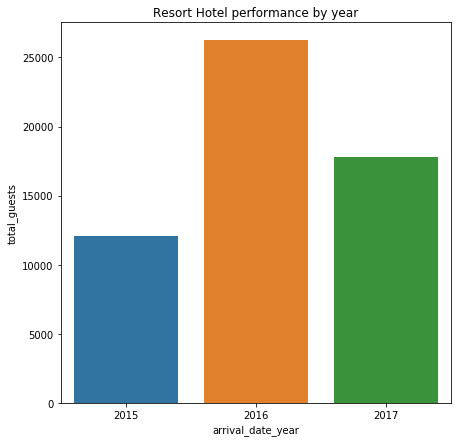

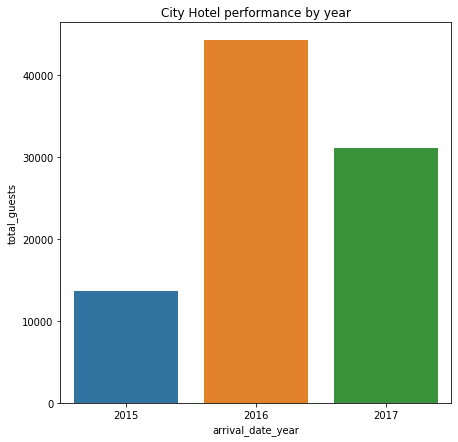

In [20]:
a=pd.DataFrame(rh.groupby(df['arrival_date_year'])['total_guests'].sum())
a.reset_index(inplace=True)
plt.figure(figsize=(7,7))

plt.title('Resort Hotel performance by year')
sns.barplot(x='arrival_date_year',y='total_guests',data=a)
b=pd.DataFrame(ch.groupby(df['arrival_date_year'])['total_guests'].sum())
b.reset_index(inplace=True)
plt.figure(figsize=(7,7))

plt.title('City Hotel performance by year')
sns.barplot(x='arrival_date_year',y='total_guests',data=b)



# In the year 2015 the footfall was almost the ame. the main difference were the years succeeding that

# lets look at the room price of different types of rooms available in the two hotels 

In [21]:
df['adr_pp']=df['adr']/(df['adults']+df['children'])
df.head()

,hotel,canceled,time gap,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,weekend nights spent,weekday nights spent,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,49.0


In [22]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

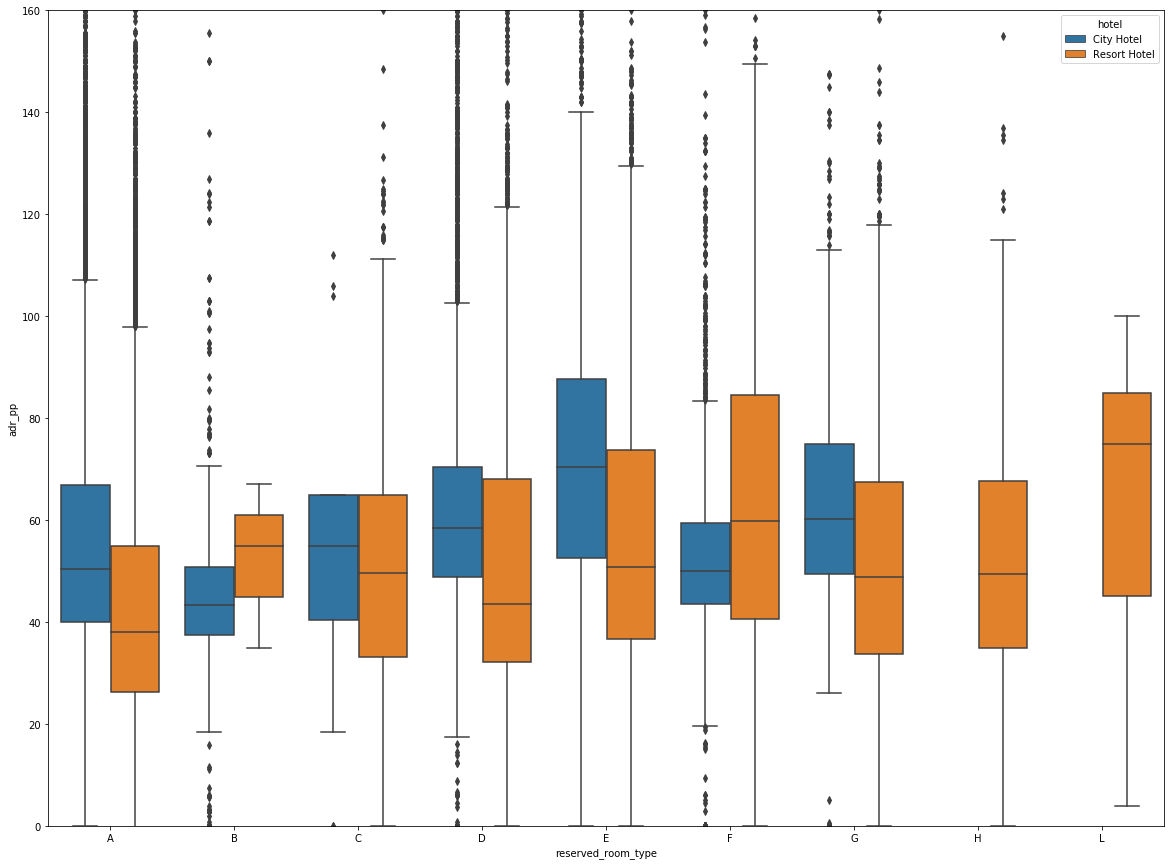

In [23]:
plt.figure(figsize=(20,15))
plt.ylim(0,160)
sns.boxplot(x='reserved_room_type',y='adr_pp',hue='hotel',data=df,order=['A','B','C','D','E','F','G','H','L'],hue_order=['City Hotel','Resort Hotel'])

# As we can see drom above most of the people are choosing A,D,E room types and the mean price of the resort hotels are less than city hotels.So problem isn't with pricing although they have F,B room types which are more than City Hotel. Maaybe the problem lies with amenities provided and the distribution or market segments

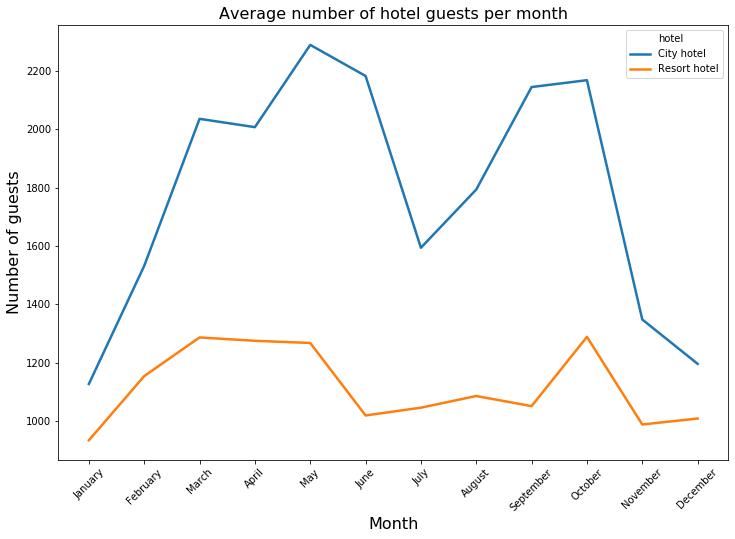

In [24]:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()


# Both the hotels have low footfall in summers(June,July). However the footfall of City hotel is increasing in April-May while that of Resort hotel is constant. 

Text(0.5, 1.0, 'No. guests staying vs total nights')

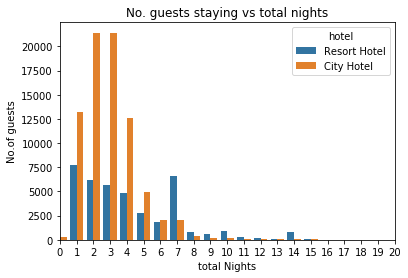

In [25]:
df['total Nights']=df['weekend nights spent']+df['weekday nights spent']
sns.countplot(x='total Nights',data=df,hue='hotel')
plt.xlim(0,20)
plt.ylabel('No.of guests')
plt.title('No. guests staying vs total nights')

# Here we can see that City hotel is preferred for shorter duration (i.e <7), for longer duration (i.e >7) resort Hotel is preferred.

# Let's look at origin of different people

([<matplotlib.patches.Wedge at 0x1147f041d88>,
 [Text(0.6954906583783629, 0.8522281056785392, 'PRT'),
  Text(-0.6292647107370322, 0.9022338520699827, 'GBR'),
  Text(-1.0785591250502098, 0.21612545840535788, 'FRA'),
  Text(-1.0008170524363404, -0.4564704016172742, 'ESP'),
  Text(-0.6380283254384882, -0.8960579534484133, 'DEU'),
  Text(-0.2791291328538643, -1.0639957364539812, 'IRL'),
  Text(-0.05185840215479031, -1.0987769137208663, 'ITA'),
  Text(0.14689292246645763, -1.0901479116749542, 'BEL'),
  Text(0.30912151309091646, -1.0556722456067424, 'NLD'),
  Text(0.45300633298405274, -1.0023897756244033, 'USA'),
  Text(0.57545611962704, -0.9374701351956712, 'BRA'),
  Text(0.677930056921288, -0.8662625686953692, 'CHE'),
  Text(0.7595116762508449, -0.7957022141722567, 'AUT'),
  Text(0.82538753591439, -0.7271419500738298, 'CN'),
  Text(0.8786887594694004, -0.6617447120923041, 'SWE'),
  Text(0.9187268527723632, -0.6049305497286351, 'POL'),
  Text(0.9490341393457005, -0.5561782109687198, 'CHN'),

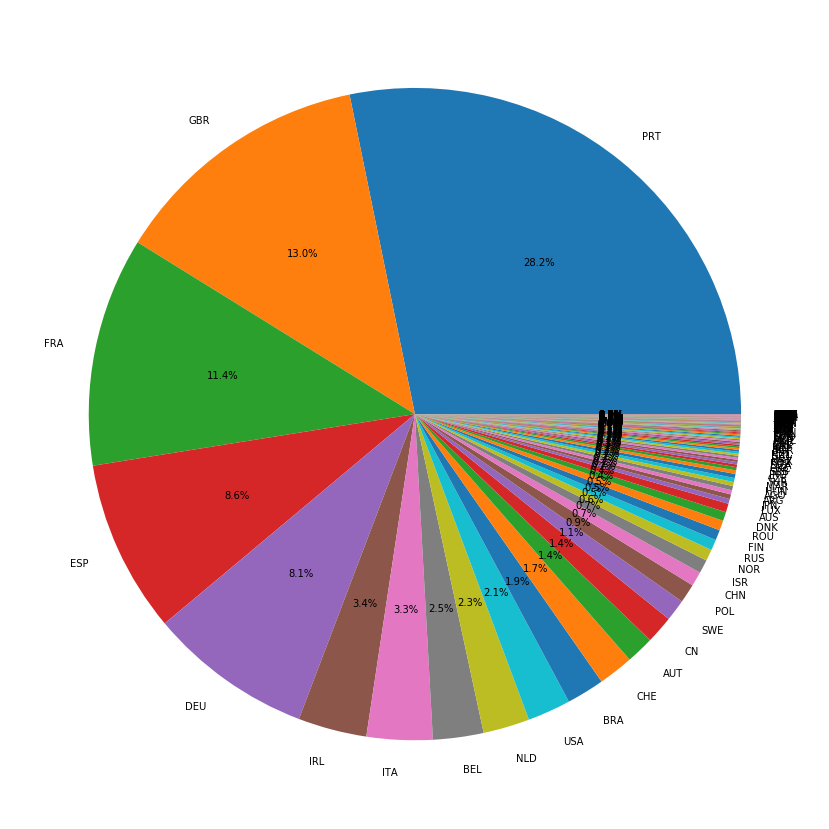

In [26]:
country_data = pd.DataFrame(df.loc[df["canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data['Country']=country_data.index
plt.figure(figsize=(20,15))
plt.pie('Guests in %',labels='Country',data=country_data,autopct='%1.1f%%')

# Here we see that majority of people are from portugal followed by Britain and Spain. Hence City Hotels might be focusing more on these countries. 

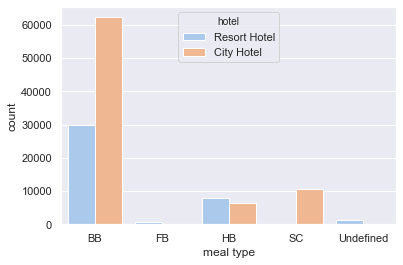

In [27]:
sns.set(style='darkgrid')
sns.countplot(x='meal type',data=df,hue='hotel',palette='pastel')

# most of the people in both the hotels prefer BB , with  majority being in the city hotel. Sc is also the meal type which is provided in only City hotel and not on resort hoteel

([<matplotlib.patches.Wedge at 0x1147d730a08>,
 [Text(0.0845823927567071, 1.096743278454694, 'Online TA'),
  Text(-0.9595767374278081, -0.5377847943066106, 'Offline TA/TO'),
  Text(0.05595898578132272, -1.0985757105954628, 'Direct'),
  Text(0.8037554475139352, -0.7509841413716231, 'Groups'),
  Text(1.0659552279600206, -0.2715500911152506, 'Corporate'),
  Text(1.0989961371694732, -0.04698393860221597, 'Complementary'),
  Text(1.0999660733349539, -0.008639300439445424, 'Aviation')],
 [Text(0.04613585059456751, 0.598223606429833, '47.5%'),
  Text(-0.5234054931424408, -0.2933371605308785, '21.2%'),
  Text(0.030523083153448753, -0.5992231148702524, '14.2%'),
  Text(0.43841206228032825, -0.4096277134754307, '10.3%'),
  Text(0.5814301243418293, -0.14811823151740938, '5.7%'),
  Text(0.5994524384560762, -0.02562760287393598, '0.9%'),
  Text(0.5999814945463384, -0.004712345694242957, '0.2%')])

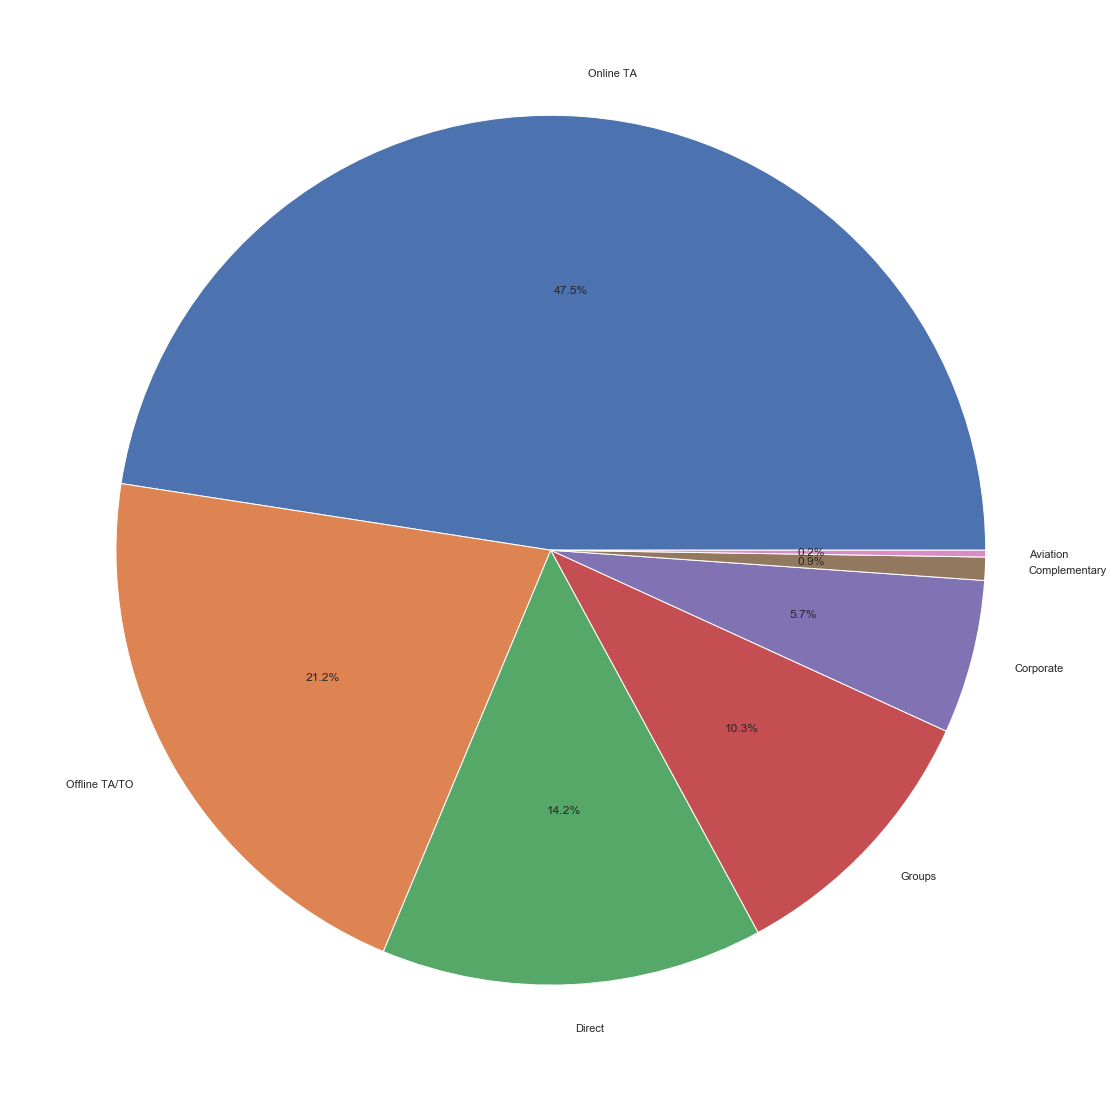

In [28]:
full_market=pd.DataFrame(df.loc[df['canceled']==0]['market_segment'].value_counts())
full_market_sum=full_market['market_segment'].sum()
full_market['percentage']=round((full_market['market_segment']/full_market_sum)*100,2)
full_market_labels=full_market.index
plt.figure(figsize=(20,20))
plt.pie('percentage',data=full_market,labels=full_market_labels,autopct='%1.1f%%')


# The above pie chart shows that major segment of the market is held by online TA's , whcih is almost half of the market.

# The mojor contributors in the other half of the market are offline TA/TO and Direct

([<matplotlib.patches.Wedge at 0x11400a08788>,
 [Text(-0.8203050394641912, 0.7328708223347766, 'TA/TO'),
  Text(0.6370214138505523, -0.896774062011075, 'Direct'),
  Text(1.0708841392540969, -0.25141034245633614, 'Corporate'),
  Text(1.0999760607579194, -0.007257117850112417, 'GDS'),
  Text(1.0999999999999963, -9.172496407158664e-08, 'Undefined')],
 [Text(-0.4474391124350134, 0.3997477212735145, '76.8%'),
  Text(0.3474662257366649, -0.4891494883696772, '16.1%'),
  Text(0.5841186214113255, -0.13713291406709244, '6.9%'),
  Text(0.5999869422315923, -0.003958427918243136, '0.2%'),
  Text(0.5999999999999979, -5.00317985845018e-08, '0.0%')])

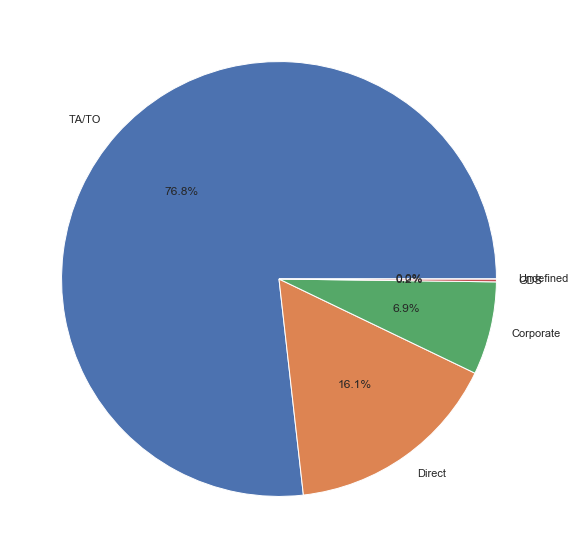

In [29]:
full_distribution=pd.DataFrame(df.loc[df['canceled']==0]['distribution_channel'].value_counts())
full_distribution_total=full_distribution['distribution_channel'].sum()
full_distribution['percentage']=round((full_distribution['distribution_channel']/full_distribution_total)*100,2)
distributors=full_distribution.index
plt.figure(figsize=(10,10))
plt.pie('percentage',data=full_distribution,autopct='%1.1f%%',labels=distributors)

#  Both the hotels have a distribution channel wich is mainly focused on TA/TO and somewhat on Direct links

# Plotting distribution channel for ch

([<matplotlib.patches.Wedge at 0x114009dfd08>,
 [Text(-0.9285755702061091, 0.5897011195651569, 'TA/TO'),
  Text(0.8013924056099366, -0.7535052834789673, 'Direct'),
  Text(1.0781843718680133, -0.21798729380305096, 'Corporate'),
  Text(1.0999372536635768, -0.011748957529427286, 'GDS')],
 [Text(-0.5064957655669685, 0.3216551561264492, '82.0%'),
  Text(0.4371231303326927, -0.4110028818976185, '12.0%'),
  Text(0.5881005664734618, -0.1189021602562096, '5.7%'),
  Text(0.5999657747255873, -0.006408522288778519, '0.3%')])

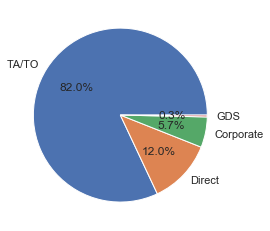

In [30]:
ch_dist=pd.DataFrame(ch['distribution_channel'].value_counts())
ch_dist_sum=ch_dist['distribution_channel'].sum()
ch_dist['percentage']=round((ch_dist['distribution_channel']/ch_dist_sum)*100,2)
ch_distributors=ch_dist.index
plt.pie('percentage',data=ch_dist,labels=ch_distributors,autopct='%1.1f%%')

# Plotting Distribution channel for rh

([<matplotlib.patches.Wedge at 0x114008d7788>,
 [Text(-0.6033473952687128, 0.9197673187401582, 'TA/TO'),
  Text(0.3254257984520651, -1.0507607004936168, 'Direct'),
  Text(1.0570910901327062, -0.30423416501446204, 'Corporate'),
  Text(1.09999999999997, 2.574735820074768e-07, 'Undefined')],
 [Text(-0.3290985792374797, 0.5016912647673589, '68.5%'),
  Text(0.17750498097385367, -0.5731422002692454, '22.6%'),
  Text(0.5765951400723851, -0.16594590818970653, '8.9%'),
  Text(0.5999999999999835, 1.4044013564044187e-07, '0.0%')])

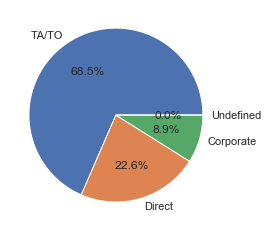

In [31]:
rh_dist=pd.DataFrame(rh['distribution_channel'].value_counts())
rh_dist_sum=rh_dist['distribution_channel'].sum()
rh_dist['percentage']=round((rh_dist['distribution_channel']/rh_dist_sum)*100,2)
rh_distributors=rh_dist.index
plt.pie('percentage',data=rh_dist,labels=rh_distributors,autopct='%1.1f%%')

#  Clearly Resort Hotels  are invensting more on Direct and corporate distribution rather than TA/TO  which has higher market segment. City hotels are investing in TA/TO and less on others  

In [32]:
rh_repeated_guests=rh['repeated guest'].sum()
rh_percentage_of_repeated_guest=round((rh_repeated_guests/rh['total_guests'].sum())*100,2)
ch_repeated_guests=ch['repeated guest'].sum()
ch_percentage_of_repeated_guest=round((ch_repeated_guests/ch['total_guests'].sum())*100,2)
print('The percentage of repeated guests in Resort Hotel is:{}%'.format(rh_percentage_of_repeated_guest))
print('The percentage of repeated guests in City Hotel is:{}%'.format(ch_percentage_of_repeated_guest))
                                      
                                      

The percentage of repeated guests in Resort Hotel is:2.97%
The percentage of repeated guests in City Hotel is:1.79%


# The number of repeated guests in resort hotels are more than city hotel. Hence Resort has  good customer experience than city hotel

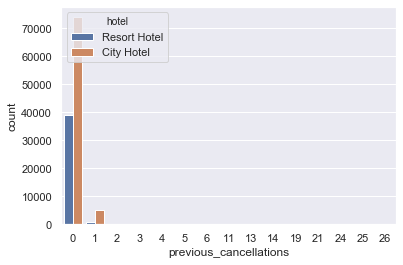

In [33]:
sns.countplot(x='previous_cancellations',data=df,hue='hotel',palette='deep')
#The no. of people cancelling  in city hotel hotel are more than people cancelling in resort.e cancelling 


In [34]:
for index,row in rh.iterrows():
    if row['canceled']==1:
        rh['total_bookings']=rh['previous_cancellations']+rh['previous_bookings_not_canceled']
    if row['canceled']==0:
        rh['total_bookings']=rh['previous_cancellations']+rh['previous_bookings_not_canceled']+1

In [35]:
for index,row in ch.iterrows():
    if row['canceled']==1:
        ch['total_bookings']=ch['previous_cancellations']+ch['previous_bookings_not_canceled']
    if row['canceled']==0:
        ch['total_bookings']=ch['previous_cancellations']+ch['previous_bookings_not_canceled']+1

In [36]:
rh_percentage_previous_cancellations=round((rh['previous_cancellations'].sum()/rh['total_bookings'].sum())*100,2)
ch_percentage_previous_cancellations=round((ch['previous_cancellations'].sum()/ch['total_bookings'].sum())*100,2)
print('The percentage of previous cancellations in resort hotel is:{}%'.format(rh_percentage_previous_cancellations))
print('The percentage of previous cancellations in city hotel is:{}%'.format(ch_percentage_previous_cancellations))


The percentage of previous cancellations in resort hotel is:0.6%
The percentage of previous cancellations in city hotel is:1.72%


# This proves that resort hotel has a better customer experience when anyone is staying in it

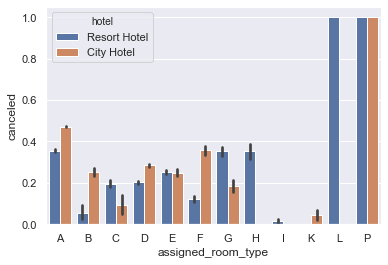

In [37]:
sns.barplot(x='assigned_room_type',y='canceled',data=df,hue='hotel',order=['A','B','C','D','E','F','G','H','I','K','L','P'])


# People who have been awarded rooms L and P  canceled most of the times

In [38]:
rh_booking=rh['booking_changes'].sum()
percentage_rh_booking=round((rh_booking/rh['total_bookings'].sum())*100,2)
ch_booking=ch['booking_changes'].sum()
percentage_ch_booking=round((ch_booking/ch['total_bookings'].sum())*100,2)
print(percentage_rh_booking)
print(percentage_ch_booking)

28.28
21.5


# The booking changes in Resort hotel are more hence the city hotels are offering a better deal in terms of amenities.

In [39]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Text(0.5, 1.0, 'distribution of segment by desposit type')

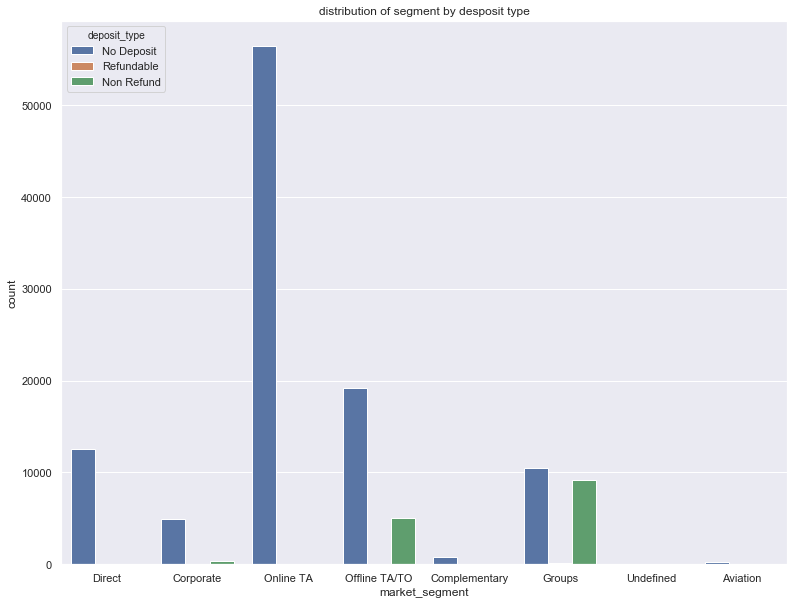

In [40]:
plt.figure(figsize=(13,10))
sns.countplot(x='market_segment',data=df,hue='deposit_type')
plt.title('distribution of segment by desposit type')

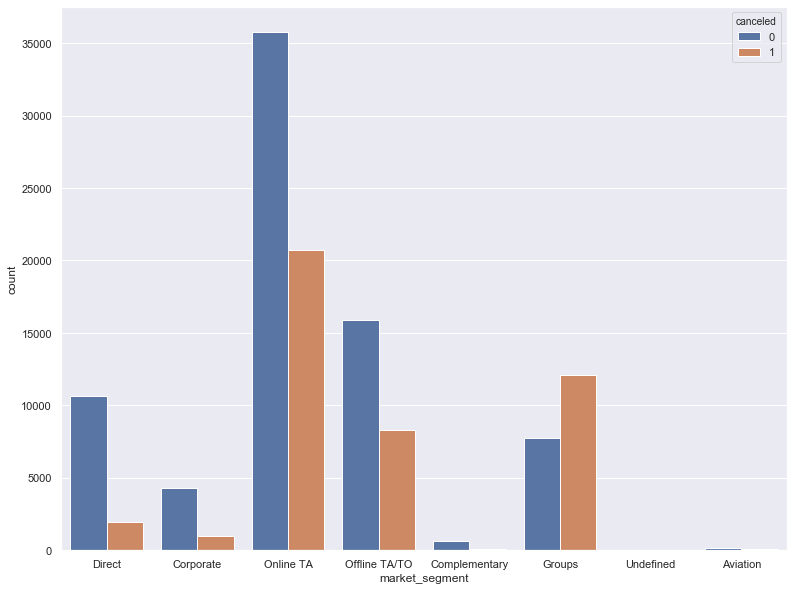

In [41]:
plt.figure(figsize = (13,10))
sns.countplot(x = "market_segment", hue = 'canceled', data = df)


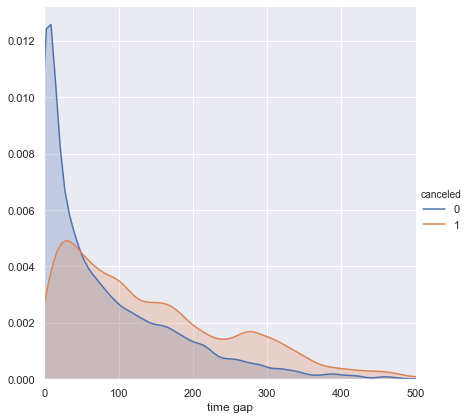

In [42]:
(sns.FacetGrid(df, hue = 'canceled',height = 6,xlim = (0,500)).map(sns.kdeplot, 'time gap', shade = True).add_legend())

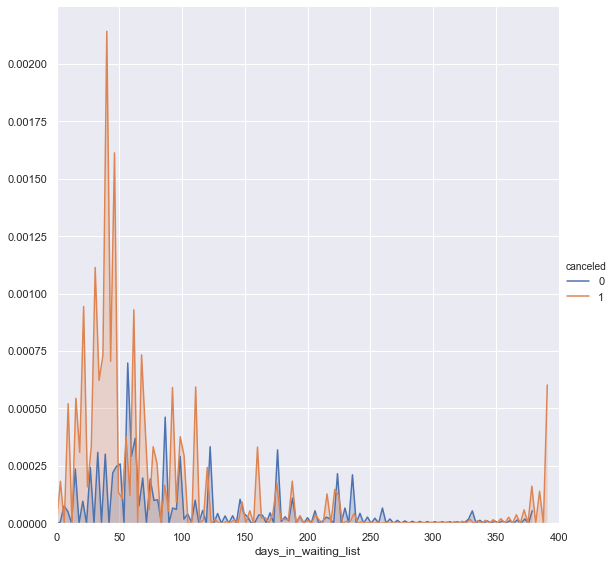

In [43]:
(sns.FacetGrid(df,hue='canceled',height = 8,xlim = (0,400)).map(sns.kdeplot, 'days_in_waiting_list', shade = True).add_legend())

In [44]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

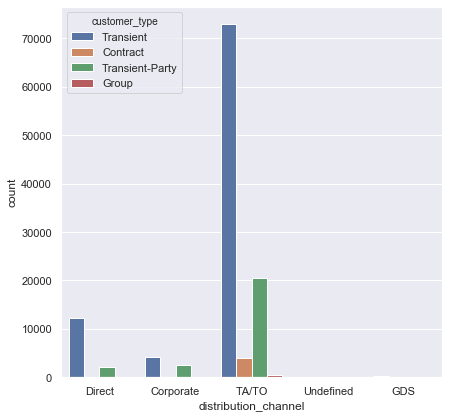

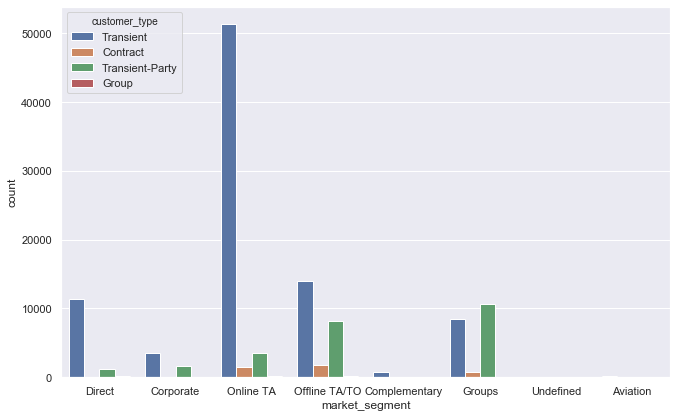

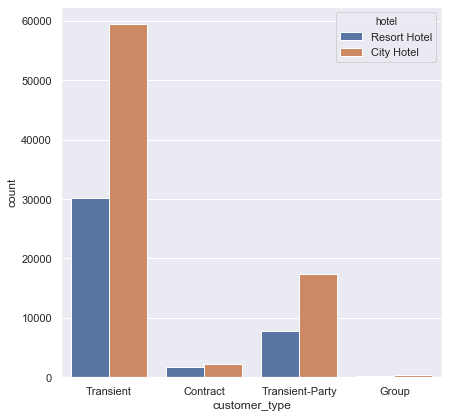

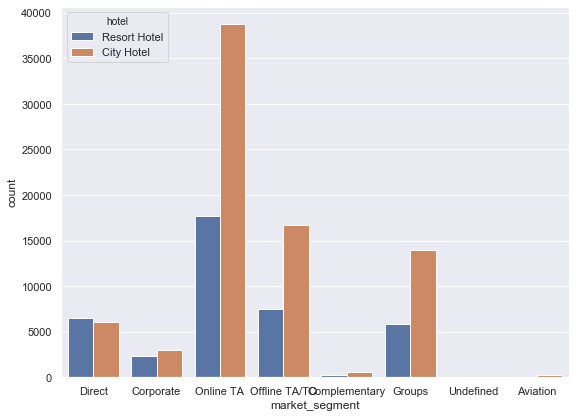

In [57]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(x='distribution_channel',data=df,hue='customer_type')
plt.figure(figsize=(24,15))
plt.subplot(2,2,2)
sns.countplot(x='market_segment',data=df,hue='customer_type')
plt.figure(figsize=(15,15))
plt.subplot(2,2,3)
sns.countplot(x='customer_type',data=df,hue='hotel')
plt.figure(figsize=(20,15))
plt.subplot(2,2,4)
sns.countplot(x='market_segment',data=df,hue='hotel')

In [75]:
df.groupby(df['hotel'])['required_car_parking_spaces'].value_counts()

hotel         required_car_parking_spaces
City Hotel    0                              77404
              1                               1921
              2                                  3
              3                                  2
Resort Hotel  0                              34570
              1                               5462
              2                                 25
              8                                  2
              3                                  1
Name: required_car_parking_spaces, dtype: int64

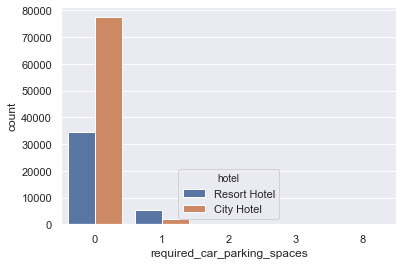

In [73]:
sns.countplot(x='required_car_parking_spaces',data=df,hue='hotel')

# Here we see how the parking spaces are effecting the reservations in hotel


# Hence from above we can see the factors affecting low footfall of resort hotel and high footfall of city hotel